## NAME : RETHINAGIRI G
## ROLL NO : 225229130
## COURSE TITLE : PRACTICAL MACHINE LEARNING LAB

### Lab 09. Employee Hopping Prediction using Random Forests

###   

#### Step-1

In [1]:
import pandas as pan

In [2]:
emp=pan.read_csv("C:\\Users\\user\\Downloads\\dataset_pml\\Employee_hopping.csv")

In [3]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
emp.shape

(1470, 35)

In [5]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
emp["Age"].value_counts()

#### Step-2 [ Extract X and y]

In [9]:
X=emp.drop("Attrition",axis=1)

In [10]:
y=emp["Attrition"].values

#### Step-3. [Feature Engineering]

In [11]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
emp_dum=["BusinessTravel","EducationField","Department","Gender","JobRole","MaritalStatus","Over18","OverTime"]

In [13]:
dummiesX = pan.get_dummies(X,columns=emp_dum)

#### Step-4

In [14]:
X.shape

(1470, 34)

In [15]:
y.shape

(1470,)

#### Step-5. [Model Development]

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(dummiesX,y,test_size=.25,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier()  
rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred=rf.predict(X_test)

#### Step-6 [Testing]

In [19]:
from sklearn.metrics import *

In [20]:
accuracy_score(y_test, y_pred)

0.875

In [21]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          No       0.88      0.99      0.93       320\n         Yes       0.67      0.08      0.15        48\n\n    accuracy                           0.88       368\n   macro avg       0.77      0.54      0.54       368\nweighted avg       0.85      0.88      0.83       368\n'

#### Step-7 [Feature importance value]

In [22]:
imp=rf.feature_importances_
imp

array([0.05294513, 0.04406456, 0.04069169, 0.01695943, 0.        ,
       0.04170964, 0.02478373, 0.03864302, 0.02144051, 0.02292761,
       0.02427507, 0.07498255, 0.04305541, 0.03425137, 0.02740993,
       0.00444482, 0.02104138, 0.        , 0.03156234, 0.04394259,
       0.0243328 , 0.01817268, 0.04125906, 0.02905377, 0.02426619,
       0.03073603, 0.00401763, 0.01021646, 0.00629047, 0.00216476,
       0.00710982, 0.00650052, 0.00710521, 0.00377547, 0.00642365,
       0.0017799 , 0.00623775, 0.00775653, 0.00673764, 0.0061964 ,
       0.00144444, 0.00193078, 0.00962975, 0.00182065, 0.00180486,
       0.0011617 , 0.00631082, 0.00818318, 0.0099643 , 0.00600414,
       0.0072191 , 0.01658899, 0.        , 0.03530234, 0.03337146])

In [23]:
f_name=pan.DataFrame(imp,index=X_train.columns,columns=["Feature Importance Values"])
f_name

,Feature Importance Values
Age,0.052945
DailyRate,0.044065
DistanceFromHome,0.040692
Education,0.016959
EmployeeCount,0.000000
EmployeeNumber,0.041710
EnvironmentSatisfaction,0.024784
HourlyRate,0.038643
JobInvolvement,0.021441
JobLevel,0.022928


In [24]:
import matplotlib.pyplot as mat

In [25]:
import seaborn as sb

Text(0, 0.5, 'Imp_Values')

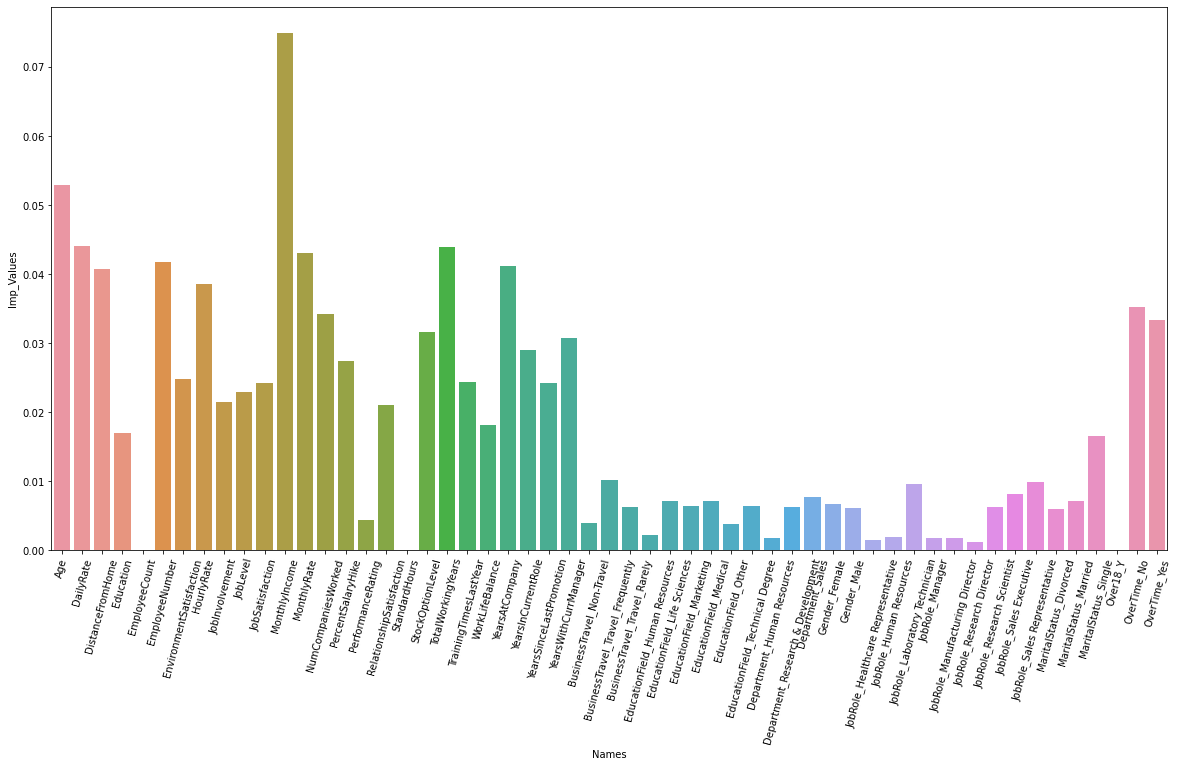

In [26]:
mat.figure(figsize=(20,10))
sb.barplot(x=f_name.index,y=f_name["Feature Importance Values"])
mat.xticks(rotation=75)
mat.xlabel("Names")
mat.ylabel("Imp_Values")

#### Step-8 [Visualize  your RF Decision Tree using graphviz]

In [27]:
from sklearn import tree
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
tree = rfc.estimators_[0]
from sklearn.tree import export_graphviz
with open("tree1.dot", "w") as f:
    f= export_graphviz(rfc.estimators_[0], out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=['No', 'Yes'], 
                           filled=True, rounded=True, 
                           special_characters=True)

In [28]:
!type tree1.dot

#### Step-09

In [29]:
rf2=RandomForestClassifier(oob_score=True,
                          random_state=42,
                          warm_start=True,
                          n_jobs=-1)
oob_list=list()

In [30]:
for n_trees in [15,20,30,40,50,100,150,200,300,400]:
    rf2.set_params(n_estimators=n_trees)
    
    rf2.fit(X_train,y_train)
    
    oob_error=1-rf2.oob_score_
    
    oob_list.append(pan.Series({'n_trees':n_trees,'oob':oob_error}))
    
    
    
rf_oob_df=pan.concat(oob_list,axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.160617
20.0,0.153358
30.0,0.144283
40.0,0.141561
50.0,0.144283
100.0,0.144283
150.0,0.143376
200.0,0.142468
300.0,0.142468


#### Step-10

[Text(0, 0.5, 'out-of-bag erroe')]

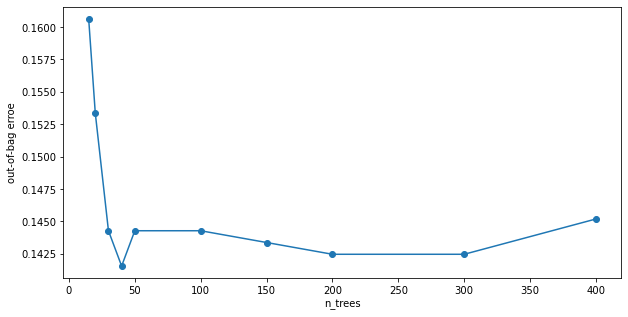

In [31]:
ax=rf_oob_df.plot(legend=False,marker='o',figsize=(10,5))
ax.set(ylabel='out-of-bag erroe')

#### Step-11  [  DecisionTreeClassifier ]

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import*

In [33]:
dt = DecisionTreeClassifier(criterion='entropy')

In [34]:
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)

In [37]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy')

In [38]:
with open("tree2.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f, max_depth=5, impurity=False, 
                             feature_names=X_train.columns.values, 
                             class_names=["Yes", "No"], filled=True)

In [39]:
!type tree2.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="OverTime_Yes <= 0.5\nsamples = 1102\nvalue = [913, 189]\nclass = Yes", fillcolor="#ea9b62"] ;
1 [label="TotalWorkingYears <= 2.5\nsamples = 780\nvalue = [698, 82]\nclass = Yes", fillcolor="#e89050"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="JobRole_Research Scientist <= 0.5\nsamples = 71\nvalue = [46, 25]\nclass = Yes", fillcolor="#f3c5a5"] ;
1 -> 2 ;
3 [label="HourlyRate <= 58.5\nsamples = 51\nvalue = [28, 23]\nclass = Yes", fillcolor="#fae8dc"] ;
2 -> 3 ;
4 [label="EnvironmentSatisfaction <= 2.5\nsamples = 18\nvalue = [5, 13]\nclass = No", fillcolor="#85c3ef"] ;
3 -> 4 ;
5 [label="samples = 9\nvalue = [0, 9]\nclass = No", fillcolor="#399de5"] ;
4 -> 5 ;
6 [label="MonthlyIncome <= 2192.5\nsamples = 9\nvalue = [5, 4]\nclass = Yes", fillcolor="#fae6d7"] ;
4 -> 6 ;
7 [label="(...)", fillcolor="#C0C0C0"] ;
6 -> 7 ;
10 [label="(...)"

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7717391304347826


In [41]:
print("Classification Report : ",classification_report(y_test,y_pred))

Classification Report :                precision    recall  f1-score   support

          No       0.89      0.84      0.87       320
         Yes       0.22      0.29      0.25        48

    accuracy                           0.77       368
   macro avg       0.55      0.57      0.56       368
weighted avg       0.80      0.77      0.79       368

